# Dimensionality Collapsion and Clustering
Clusterization of 9 species of algae depending on their concentration with several methods

## Preparation

In [237]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ori_data = pd.read_csv('matrix_ready.csv')

In [218]:
# Classes and corresponding colors
classes = ori_data.loc[:, 'Species'].unique()
colors = '#00FF7F', '#006400', '#00FF00', '#8B0000', '#DC143C', '#800080', '#808000', '#9370DB', '#00CED1'

# Function for plotting
def draw_clustering(name, transformed, y, classes, colors, lda, locus='best'):
    """Plot results of dimensionality collapsion"""
    figure = plt.figure(figsize=(10, 6))
    
    for sp, color in zip(classes, colors):
        plt.scatter(transformed[sp == y, 0], 
                    transformed[sp == y, 1], 
                    alpha=0.8, color=color, label=sp)
    if lda:
        title = 'LDA plot of 9 algae species'
        xlab = '1st modified axis'
        ylab = '2nd modified axis'
    else:
        title = 'PCA plot of 9 algae species'
        xlab = 'PC1'
        ylab = 'PC2'
    plt.legend(loc=locus, shadow=False)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig(name, format='svg', bbox_inches='tight')

## LDA

### With Scaling

In [128]:
# Scaling
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))

In [129]:
lda = LinearDiscriminantAnalysis(n_components=2)
transformed = lda.fit_transform(transformed, ori_data.loc[:, 'Species'])

/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


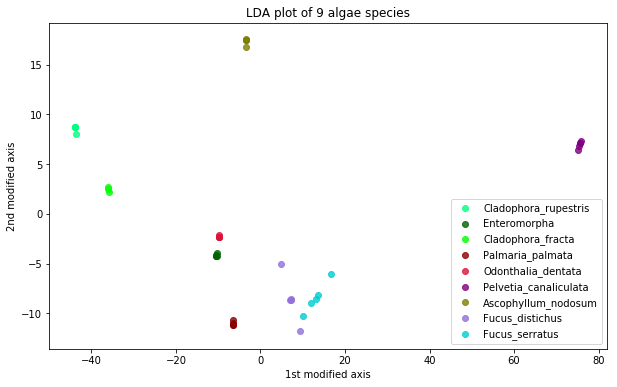

In [131]:
draw_clustering('lda', 
                transformed, ori_data.loc[:, 'Species'], 
                classes, colors, lda=True, locus='lower right')

## PCA

### Without Scaling

In [32]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))

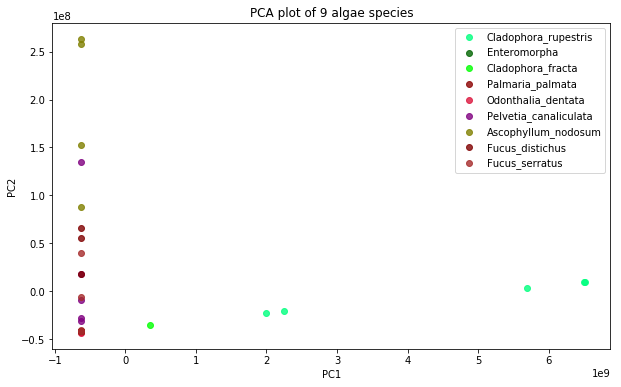

In [33]:
draw_clustering('unscaled_pca', 
                transformed, ori_data.loc[:, 'Species'], 
                classes, colors, False)

# figure = plt.figure(figsize=(10, 6))
# for sp, color in zip(classes, colors):
#     plt.scatter(transformed[sp == ori_data.loc[:, 'Species'], 0], 
#                 transformed[sp == ori_data.loc[:, 'Species'], 1], 
#                 alpha=0.8, color=color, label=sp)

# plt.legend(loc='lower right', shadow=False)
# plt.title('PCA')
# plt.xlabel('PC1')
# plt.ylabel('PC2')

### With Scaling

In [132]:
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))

In [133]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(transformed)

In [134]:
pca.explained_variance_

array([ 39.5849878 ,  35.72430781])

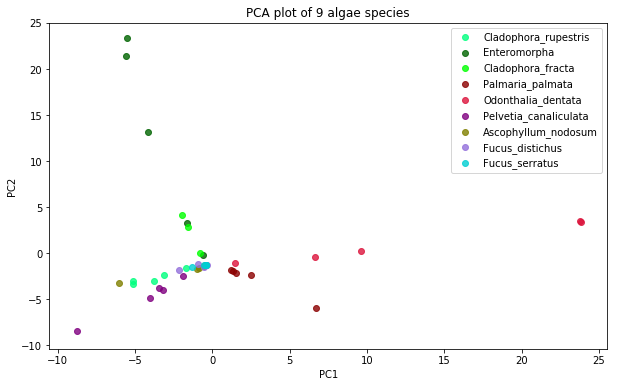

In [135]:
draw_clustering('pca', 
                transformed, ori_data.loc[:, 'Species'], 
                classes, colors, False)

### Isomap

In [235]:
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))
isomap = Isomap(n_neighbors=3).fit_transform(transformed)

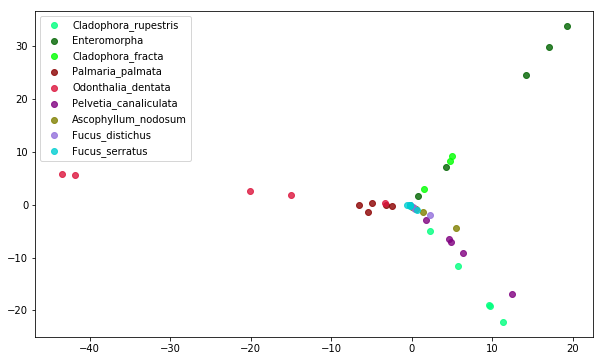

In [236]:
figure = plt.figure(figsize=(10, 6))

for sp, color in zip(classes, colors):
    plt.scatter(isomap[sp == ori_data['Species'], 0], 
                isomap[sp == ori_data['Species'], 1], 
                alpha=0.8, color=color, label=sp)

plt.legend(loc='best', shadow=False)
# plt.title()
# plt.xlabel(xlab)
# plt.ylabel(ylab)
# plt.savefig(name, format='svg', bbox_inches='tight')


### LLE

In [244]:
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))
isomap = LocallyLinearEmbedding(n_neighbors=4).fit_transform(transformed)

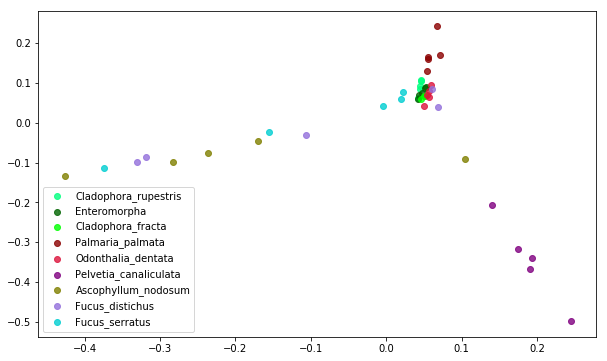

In [245]:
figure = plt.figure(figsize=(10, 6))

for sp, color in zip(classes, colors):
    plt.scatter(isomap[sp == ori_data['Species'], 0], 
                isomap[sp == ori_data['Species'], 1], 
                alpha=0.8, color=color, label=sp)

plt.legend(loc='best', shadow=False)

#### Modified variant

In [271]:
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))
isomap = LocallyLinearEmbedding(n_components=2, n_neighbors=4, method='modified').fit_transform(transformed)

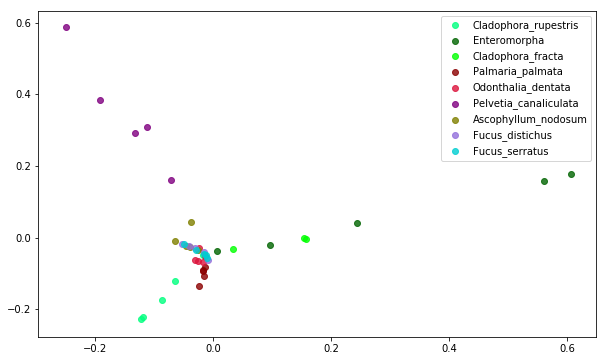

In [272]:
figure = plt.figure(figsize=(10, 6))

for sp, color in zip(classes, colors):
    plt.scatter(isomap[sp == ori_data['Species'], 0], 
                isomap[sp == ori_data['Species'], 1], 
                alpha=0.8, color=color, label=sp)

plt.legend(loc='best', shadow=False)

## Clustering
## DBSCAN

### Scaling data

In [136]:
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))

### Collapse features

In [220]:
lda = LinearDiscriminantAnalysis(n_components=25)
transformed = lda.fit_transform(transformed, ori_data.loc[:, 'Species'])

/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### DBSCAN

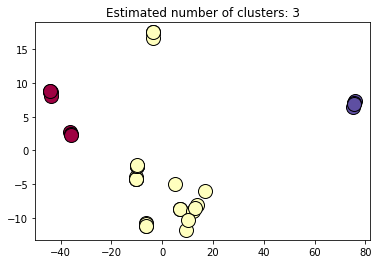

In [221]:
# Plotting
X = transformed
db = DBSCAN(eps=25, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colorrrs = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colorrrs):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('dbscan_e7_ms5', format='svg')

### K-means

#### Scaling

In [149]:
num_data = ori_data.drop(['Species', 'Sample'], axis=1)

In [151]:
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))
lda = LinearDiscriminantAnalysis(n_components=25)
transformed = lda.fit_transform(transformed, ori_data.loc[:, 'Species'])

/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Plotting

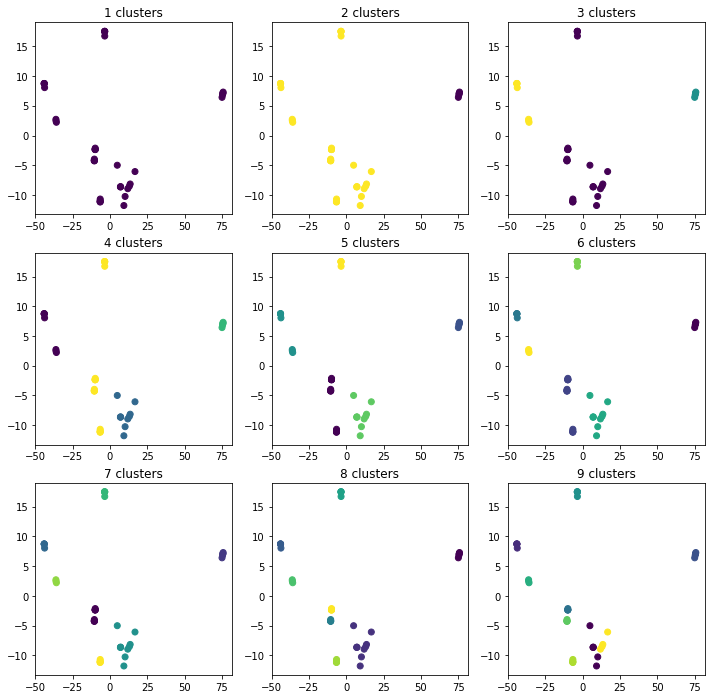

In [163]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
errors = []

for i, ax in enumerate(axes.flat, 1):
    clusters = KMeans(n_clusters=i)
    trf = clusters.fit_predict(transformed)
    errors.append(clusters.inertia_)
    ax.scatter(transformed[:, 0], transformed[:, 1], c=trf)
    ax.set_title(f'{i} clusters')

# plt.savefig('kmeans', format='svg', bbox_inches='tight')

#### Best clusters number determining

In [166]:
errors

[49943.996237479754,
 17278.540663461023,
 6702.4125757951788,
 3909.487577362092,
 1556.8467790961251,
 1043.7232787565708,
 684.19983609304029,
 423.04077192305436,
 258.84631533021502]

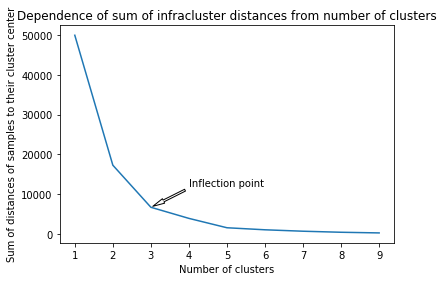

In [177]:
plt.plot(range(1, 10), errors)
plt.title('Dependence of sum of infracluster distances from number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of distances of samples to their cluster center')
plt.annotate('Inflection point', (3, 6702), (4, 12000),
             arrowprops=dict(facecolor='white', shrink=0.05, width=2, headwidth=5))
plt.savefig('elbow', format='svg', size=(8, 12), bbox_inches='tight')

### Agglomerative clustering

In [281]:
# Transformation
scaler = StandardScaler()
transformed = scaler.fit_transform(ori_data.drop(['Species', 'Sample'], axis=1))
lda = LinearDiscriminantAnalysis(n_components=25)
transformed = lda.fit_transform(transformed, ori_data.loc[:, 'Species'])

/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


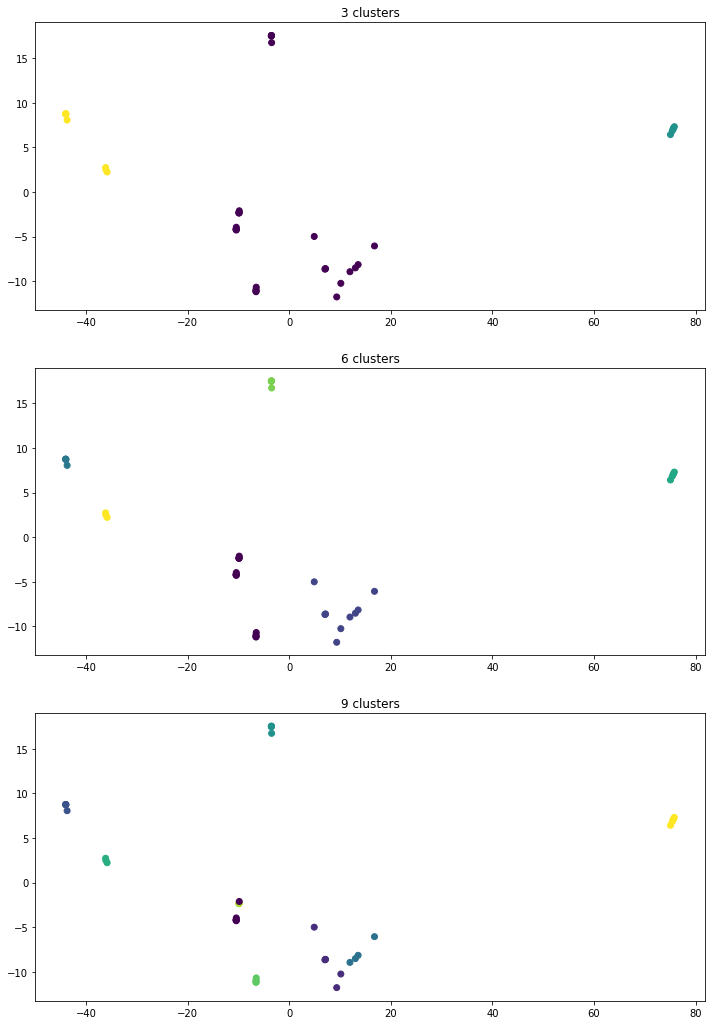

In [303]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, ax in enumerate(axes.flat, 1):
    aggr = AgglomerativeClustering(n_clusters=3 * i)
    trf = aggr.fit_predict(transformed)
#     print(f'\n{aggr.children_}\n')
    ax.scatter(transformed[:, 0], transformed[:, 1], c=trf)
    ax.set_title(f'{aggr.n_clusters} clusters')
plt.savefig('agg_clusters')